# Seattle Airbnb Exploratory Analysis

## We will employ CRISP-DM to analyse the Seattle Airbnb dataset.

### I. Importing the required libraries

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
%matplotlib inline

### II. Exploring first dataset 

In [2]:
cal=pd.read_csv('calendar.csv')
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [4]:
cal.shape

(1393570, 4)

In [5]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

### Data Cleaning

In [6]:
#as we can see, price is a string here
#removing non-numerical symbols from the price column
cal['price']=cal['price'].str.replace(',','')
cal['price']=cal['price'].str.replace('$','')
#converting string to float
cal['price']=cal['price'].astype(float)

In [7]:
#converting string type date column to datetime type
cal['date'] = pd.to_datetime(cal['date'])
cal.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [8]:
cal.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [9]:
#imputing missing values with 0
cal=cal.fillna(0)
#extracting month and year from date and storing in new column
cal['month'] = cal['date'].dt.month
cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,0.0,1
3,241032,2016-01-07,f,0.0,1
4,241032,2016-01-08,f,0.0,1


In [10]:
cal=pd.get_dummies(cal)
cal.head()

,listing_id,date,price,month,available_f,available_t
0,241032,2016-01-04,85.0,1,0,1
1,241032,2016-01-05,85.0,1,0,1
2,241032,2016-01-06,0.0,1,1,0
3,241032,2016-01-07,0.0,1,1,0
4,241032,2016-01-08,0.0,1,1,0


### 1. Which months have the most Airbnb listings?

Text(0, 0.5, 'Available Listings')

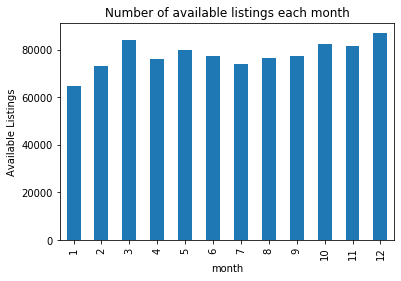

In [11]:
#Comparing number of available listings each month
cal.groupby(cal['month'])['available_t'].sum().plot(kind='bar');
plt.title('Number of available listings each month')
plt.ylabel('Available Listings')

In [12]:
cal.groupby(cal['month'])['available_t'].sum()

month
1     64937.0
2     73321.0
3     83938.0
4     76037.0
5     79971.0
6     77244.0
7     74222.0
8     76347.0
9     77246.0
10    82438.0
11    81780.0
12    87061.0
Name: available_t, dtype: float64

December has the most number of lisitngs, followed by October and November. It can be concluded that October-December are the peak months.

### 2. Which months fetch the highest prices?

<Figure size 1008x432 with 0 Axes>

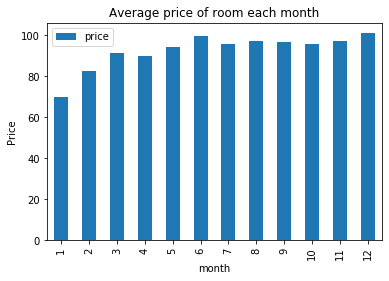

In [13]:
#Finding average price of listings each month
plt.figure(figsize=(14,6))
cal.groupby(['month'])[['price']].mean().plot(kind='bar');
plt.title('Average price of room each month');
plt.ylabel('Price');

In [14]:
cal.groupby(['month'])['price'].mean()

month
1      69.683499
2      82.308439
3      91.233047
4      89.683700
5      94.281823
6      99.453597
7      95.377854
8      97.181255
9      96.612092
10     95.444659
11     96.879911
12    100.958803
Name: price, dtype: float64

Looks like December fetches the highest average price, followed by June.

### 3. What is the total revenue that can be generated each month?

Text(0, 0.5, 'Price')

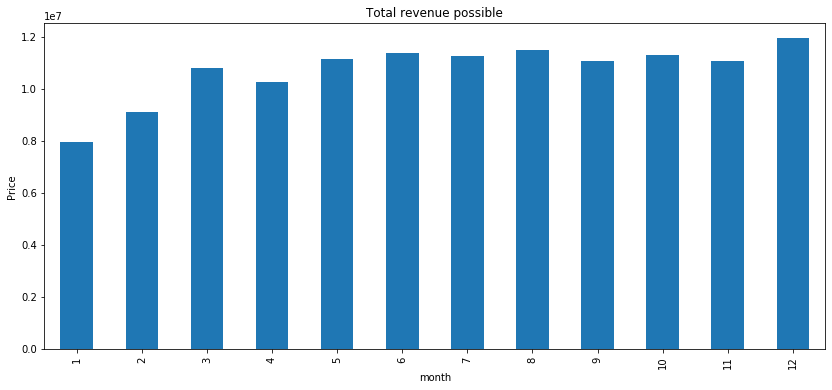

In [15]:
#Finding total revenue possible from listings, each month
plt.figure(figsize=(14,6))
cal.groupby(['month'])['price'].sum().plot(kind='bar');
plt.title('Total revenue possible')
plt.ylabel('Price')

In [16]:
cal.groupby(['month'])['price'].sum()

month
1      7981548.0
2      9113355.0
3     10798161.0
4     10272371.0
5     11159008.0
6     11391415.0
7     11288732.0
8     11502179.0
9     11065949.0
10    11296639.0
11    11096625.0
12    11949282.0
Name: price, dtype: float64

Again December is the peak revenue generating month, followed by August. 

### III. Exploring second dataset

In [17]:
#reading in the data
listings=pd.read_csv('listings.csv')
#displaying first few rows
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [18]:
#overview of data
print(listings.shape)
listings.info()

(3818, 92)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url               

In [19]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [20]:
#as we can see, price is a string here
#replacing non-numerical symbols from the price column
listings['price']=listings['price'].str.replace(',','')
listings['price']=listings['price'].str.replace('$','')
#converting string to float
listings['price']=listings['price'].astype(float)

In [21]:
listings['neighbourhood_cleansed'].nunique()

87

### 4. Which neighbourhoods are the most expensive and the cheapest?

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

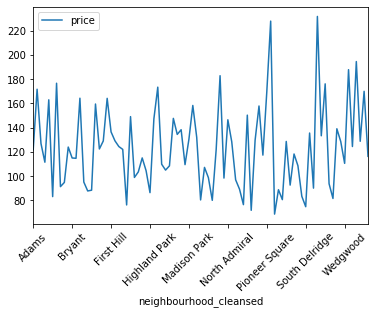

In [22]:
#plotting a graph to look at the average pricing in each neighbourhood
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();
plt.xticks(rotation=45)

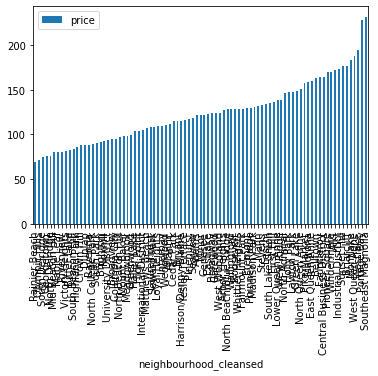

In [23]:
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price').plot(kind='bar');

In [24]:
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().max()

price    231.705882
dtype: float64

In [25]:
grouped_neigh=listings.groupby(['neighbourhood_cleansed'])[['price']].mean()
grouped_neigh.sort_values(by=['price'], ascending=False)

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


We can see that the maximum average price is $231.705882 and it is concluded that Southeast Magnolia has the most expensive listings.

In [26]:
grouped_neigh.sort_values(by=['price'])

,price
neighbourhood_cleansed,
Rainier Beach,68.555556
Olympic Hills,71.687500
South Delridge,74.666667
Georgetown,76.125000
North Delridge,76.375000
Mid-Beacon Hill,79.933333
Maple Leaf,80.261905
Riverview,80.500000
Victory Heights,81.466667


Rainier Beach is the cheapest neighbourhood with an average price of $68.555556.

### 5. How much time do the hosts take in responding?

Text(0.5, 1.0, 'Response Time')

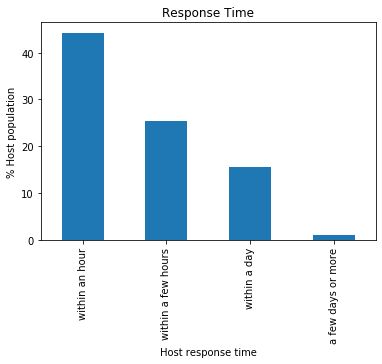

In [27]:
resp_time=listings['host_response_time'].value_counts()
((resp_time/listings.shape[0])*100).plot(kind="bar");
plt.xlabel('Host response time')
plt.ylabel('% Host population')
plt.title("Response Time")

It is concluded that most hosts (40% above) reply within an hour.

### 6. Which are the top ten neighbourhoods in terms of number of listings?

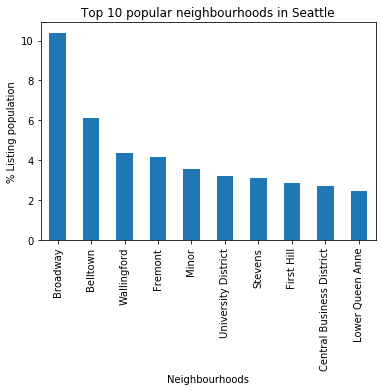

In [28]:
location=listings['neighbourhood_cleansed'].value_counts()
((location[0:10]/listings.shape[0])*100).plot(kind="bar");
plt.ylabel('% Listing population')
plt.xlabel('Neighbourhoods')
plt.title("Top 10 popular neighbourhoods in Seattle");

### 7. What are the main types of properties available?

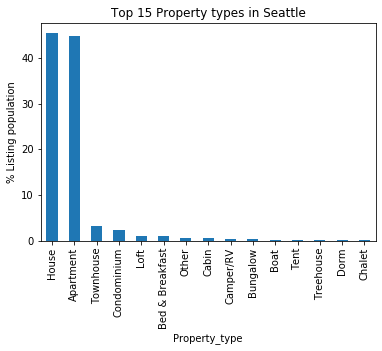

In [29]:
proptype=listings['property_type'].value_counts()
((proptype[0:15]/listings.shape[0])*100).plot(kind="bar");
plt.ylabel('% Listing population')
plt.xlabel('Property_type')
plt.title("Top 15 Property types in Seattle");

Most of the listed properties are either houses or apartments.

### 8. Which factors affect ratings and prices the most?

In [30]:
df_reviews=listings[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','price']]

#Correlation matrix
corr_ratings=df_reviews.corr()
corr_ratings

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
review_scores_rating,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.055551
review_scores_accuracy,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878,0.019026
review_scores_cleanliness,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354,0.054357
review_scores_checkin,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263,0.007877
review_scores_communication,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772,0.012990
review_scores_location,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252,0.075069
review_scores_value,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000,-0.041776
price,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,1.000000


In [31]:
df_amenities=listings[['bathrooms', 'bedrooms', 'beds','guests_included',
       'minimum_nights', 'maximum_nights','price']]

###Correlation matrix
corr_amenities=df_amenities.corr()
corr_amenities

,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,price
bathrooms,1.000000,0.610937,0.532838,0.304780,0.006358,-0.015322,0.516424
bedrooms,0.610937,1.000000,0.753167,0.457009,0.011957,-0.008591,0.627720
beds,0.532838,0.753167,1.000000,0.460512,0.002670,-0.009114,0.589525
guests_included,0.304780,0.457009,0.460512,1.000000,-0.001659,-0.018637,0.392875
minimum_nights,0.006358,0.011957,0.002670,-0.001659,1.000000,0.003161,0.017297
maximum_nights,-0.015322,-0.008591,-0.009114,-0.018637,0.003161,1.000000,-0.003336
price,0.516424,0.627720,0.589525,0.392875,0.017297,-0.003336,1.000000


In [32]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    """
    Plotting a confusion matrix for each pair of columns in the above created dataframes
    input:  
    Pandas dataframe
    output: 
    A matrix that shows the correlation between the variables in the dataframe.
    """
    corr=df.corr()
    fig=plt.figure()
    ax=fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()

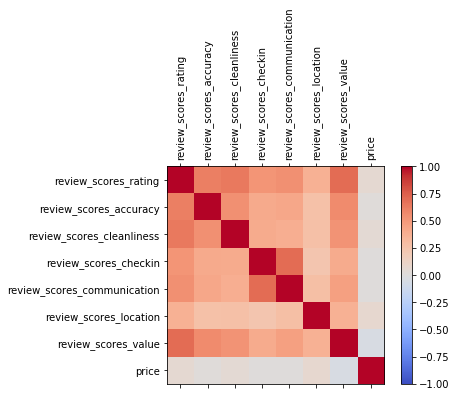

In [33]:
#Correlation matrix for reviews dataframe
correlation_matrix(df_reviews)

Cleanliness, value and accuracy seem to be the most influential factors affecting a rating, followed by checkin and communication.

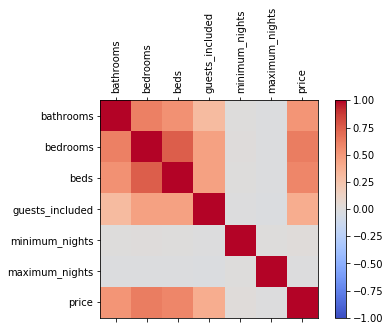

In [34]:
#Correlation matrix for amenities dataframe
correlation_matrix(df_amenities)

Bedrooms offered by the host seem to be the most influential factors affecting the price, follwed by beds and bathrooms. Minimum and maximum nights offered do not affect the price as such.

### IV. Predicting prices using Linear Regression

In [35]:
#extracting numerical columns and storing in new df
listings_num=listings.select_dtypes(include=['float64', 'int64'])
listings_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
id                                3818 non-null int64
scrape_id                         3818 non-null int64
host_id                           3818 non-null int64
host_listings_count               3816 non-null float64
host_total_listings_count         3816 non-null float64
latitude                          3818 non-null float64
longitude                         3818 non-null float64
accommodates                      3818 non-null int64
bathrooms                         3802 non-null float64
bedrooms                          3812 non-null float64
beds                              3817 non-null float64
square_feet                       97 non-null float64
price                             3818 non-null float64
guests_included                   3818 non-null int64
minimum_nights                    3818 non-null int64
maximum_nights                    3818 non-null int64
availability_

In [36]:
#finding number of missing values
np.sum(listings_num.isnull())

id                                   0
scrape_id                            0
host_id                              0
host_listings_count                  2
host_total_listings_count            2
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
square_feet                       3721
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               647
review_scores_accuracy             658
review_scores_cleanliness          653
review_scores_checkin              658
review_scores_communicati

In [37]:
print(listings_num['bathrooms'].min())
print(listings_num['bedrooms'].min())
print(listings_num['beds'].min())
print(listings_num['host_listings_count'].min())
print(listings_num['host_total_listings_count'].min())

0.0
0.0
1.0
1.0
1.0


###### Dealing with missing values
dropping columns with many missing values: license and square_feet

dropping columns that arent required : scrape_id, host_id

assuming all airbnbs have atleast one bedroom and bed

assuming all hosts have atleast one listing

assuming all missing bathroom data is 0

In [38]:
cols_drop=listings_num[['square_feet', 'license', 'scrape_id', 'host_id']]
listings_num.drop(cols_drop, axis=1, inplace=True)
#imputing missing values of columns
#let's assume all airbnbs have atleast one bed and bedroom, hence imputing with 1 
listings_num['bathrooms'].fillna(0, inplace=True)
listings_num['bedrooms'].fillna(1, inplace=True)
listings_num['beds'].fillna(1, inplace=True)
listings_num['host_listings_count'].fillna(1, inplace=True)
listings_num['host_total_listings_count'].fillna(1, inplace=True)
listings_num.head()

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89


In [39]:
#we will use the following columns to predict price. 
features= listings_num[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
features.fillna(0, inplace=True)
np.sum(features.isnull())
#our target variable is price

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
guests_included                0
guests_included                0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [40]:
target=listings_num['price']
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
#defining our model
lr=LinearRegression()
#fitting our model
lr.fit(X_train, y_train)
#predicting prices
pred=lr.predict(X_test)
#finding MSE and r2 score
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

3193.9193025543955
0.5416641270593243


With linear regression, we have achieved an r2 score of 49%. Ideally, more data engineering should be done to achieve a better accuracy.

### IV. Exploring third dataset

In [41]:
rev=pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This dataset cannot be used for much quantitative analyses. NLP can be used on the 'comments' column to perform sentiment analysis of various listings.

### V. Conclusion

We can see that the dataset most relevant to our analysis for this question is the listings dataset. The calendar dataset looks to be more relevant to supplement the listings dataset for our 2nd question on popular times and availability.